In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter as pc
import itertools
import pandas as pd

from utilities_hw2 import plot_results

# FourPeaks

With t=40%, simulated annealing generally just finds the local minimum, and GA finds the global at small n

In [41]:
iters = 5 # number of iterations for each setting in grid search

results = {}    

fitness_fn = mlrose.FourPeaks(t_pct=0.4)

param_grid_problem = {'fitness_fn': fitness_fn,
                      'max_val': 2,
                      'length': range(10, 61, 10), 
                     }
problem = mlrose.DiscreteOpt

algorithms = {
    'MIMIC': {
        'algorithm': mlrose.mimic,
        'param_grid_algorithm': {'return_statistics': True, 'pop_size': ['5*problem_length'], 'keep_pct': [0.2], 'max_attempts': [10], 'max_iters': 1000},
    },
    'Hill Climbing': {
        'algorithm': mlrose.hill_climb,
        'param_grid_algorithm': {'return_statistics': True, 'restarts': 5},
    },
    'Hill Climbing (sample)': {
        'algorithm': mlrose.random_hill_climb,
        'param_grid_algorithm': {'return_statistics': True, 'restarts': 5, 'max_attempts': 20},
    },
    'Simulated Annealing': {
        'algorithm': mlrose.simulated_annealing,
        'param_grid_algorithm': {'return_statistics': True, 'max_attempts': 100},
    },
    'Genetic Algorithm': {
        'algorithm': mlrose.genetic_alg,
        'param_grid_algorithm': {'return_statistics': True, 'elite': 0.3, 'pop_size': 'problem_length', 'mutation_prob': 0.1, 'max_attempts': 100},
    },

}

for k, d in algorithms.items():
    d['problem'] = problem
    d['param_grid_problem'] = param_grid_problem

    
for algo_name, settings in algorithms.items():
    print(f"Looping for {algo_name}")
    gs = mlrose.GridSearch(algorithm=settings['algorithm'], param_grid_algorithm=settings['param_grid_algorithm'], 
                           problem=settings['problem'], param_grid_problem=settings['param_grid_problem'], iters=iters)
    gs.evaluate()
    results[algo_name] = gs.results

Looping for MIMIC
Running case 1/6: iteration 0
MIMIC finished after using 10/10 attempts, 11/1000, iters
Running case 1/6: iteration 1
MIMIC finished after using 10/10 attempts, 12/1000, iters
Running case 1/6: iteration 2
MIMIC finished after using 10/10 attempts, 12/1000, iters
Running case 1/6: iteration 3
MIMIC finished after using 10/10 attempts, 11/1000, iters
Running case 1/6: iteration 4
MIMIC finished after using 10/10 attempts, 11/1000, iters
Running case 2/6: iteration 0
MIMIC finished after using 10/10 attempts, 12/1000, iters
Running case 2/6: iteration 1
MIMIC finished after using 10/10 attempts, 14/1000, iters
Running case 2/6: iteration 2
MIMIC finished after using 10/10 attempts, 12/1000, iters
Running case 2/6: iteration 3
MIMIC finished after using 10/10 attempts, 14/1000, iters
Running case 2/6: iteration 4
MIMIC finished after using 10/10 attempts, 14/1000, iters
Running case 3/6: iteration 0
MIMIC finished after using 10/10 attempts, 21/1000, iters
Running case 3

Search ended with attempts>max_attempts (100>100).  Iters=150
Running case 5/6: iteration 4
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=161
Running case 6/6: iteration 0
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=188
Running case 6/6: iteration 1
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=213
Running case 6/6: iteration 2
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=122
Running case 6/6: iteration 3
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=264
Running case 6/6: iteration 4
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=109


In [42]:
results_df = {k: pd.DataFrame(r) for k, r in results.items()}
# for k, df in results_df.items():
#     print(df)

In [ ]:
plot_results(results_df)

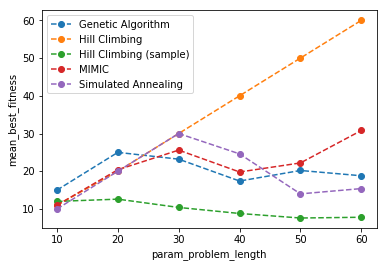

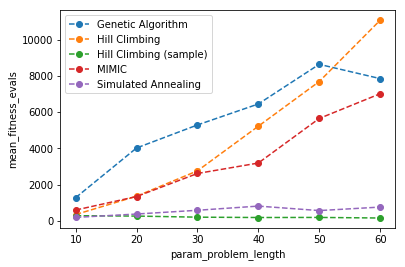

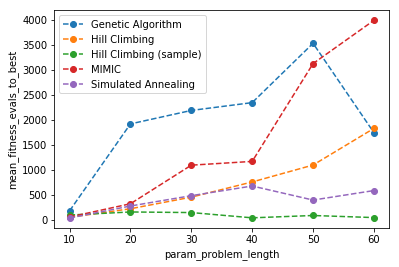

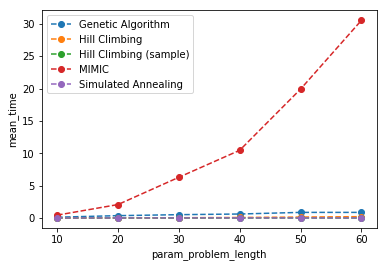

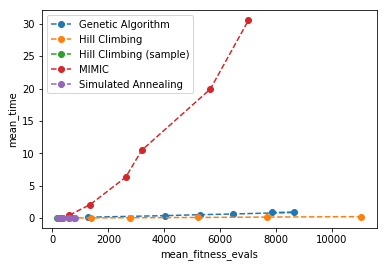

In [38]:
plot_results(results_df)